# Task 1.4 Feature analysis   

TODO: Organize and delete unncessary stuff  
Question: what is the right way to plot chi square test result

- compute correlation between features
- detect highly correlated features -> potential redundant features
- rank importance of features 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None) # show full dataframe

In [3]:
# import data
train_val = pd.read_csv("../data/training_set_values.csv")
train_label = pd.read_csv("../data/training_set_labels.csv")

In [4]:
# merge train_set_values and train_set_labels on ID
train_data = pd.merge(train_val, train_label, on="id")

In [5]:
drop_columns = ["id", "date_recorded", "funder", "installer", "wpt_name", "subvillage", "ward",
                "public_meeting", "recorded_by", "scheme_name"]

duplicated_columns = ["extraction_type", "management_group", "payment_type",
                     "quantity_group", "source_type"]

categorical_columns = ["basin", "region", "lga", "scheme_management", "permit",
                        "extraction_type_group", "extraction_type_class",
                       "management", "payment",
                       "water_quality",  "quality_group", "quantity", "source", "source_class",
                       "waterpoint_type", "waterpoint_type_group", "status_group"]

### Correlation heat map  

<Axes: ylabel='Frequency'>

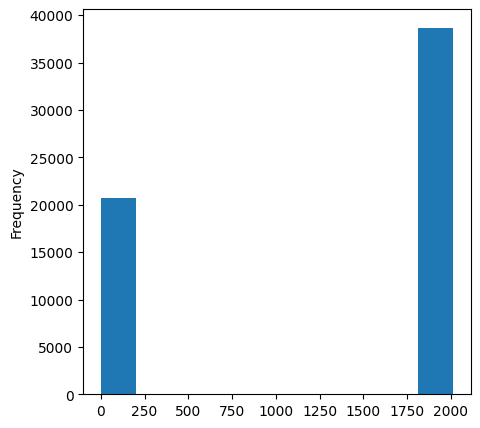

In [8]:
train_data.construction_year.plot(kind="hist", figsize=[5,5])

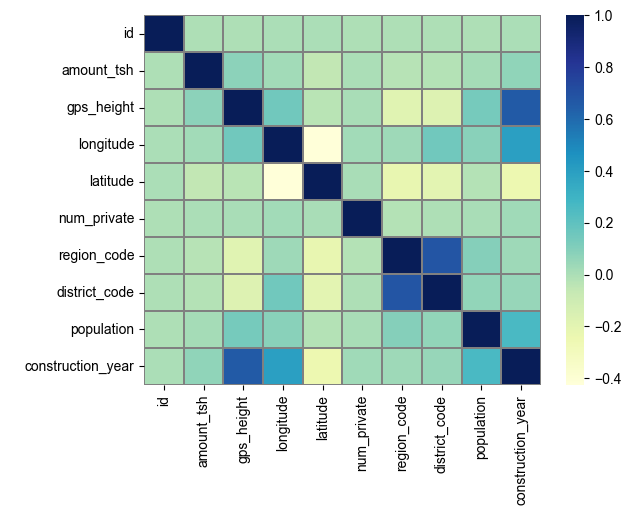

In [9]:
# Compute correlation matrix
co_mtx = train_data.corr(numeric_only=True)

# Plot correlation heatmap
sns.heatmap(co_mtx, cmap="YlGnBu", annot=False, linewidths=0.3, linecolor='gray', xticklabels=True, yticklabels=True)


sns.set_theme(rc={'figure.figsize':(12,10)})


### Chi square test

In [ ]:
# create dataframe only with categorical data

df_categorical= pd.DataFrame(data = train_data.dtypes, columns = ['a']).reset_index()

categorical_variables = list(df_categorical['index'].loc[df_categorical['a'] == 'object'])
df_categorical = train_data[categorical_variables]


print(df_categorical.shape)

(59400, 31)


In [ ]:
# perform chi square test

from scipy.stats import chi2_contingency
# https://stackoverflow.com/questions/48035381/correlation-among-multiple-categorical-variables

# factors_paired = [(i,j) for i in df_categorical.columns.values for j in df_categorical.columns.values] 

chi2, p_values =[], []


for f in df_categorical.columns:
    chitest = chi2_contingency(pd.crosstab(df_categorical[f], df_categorical["status_group"]))   
    chi2.append(chitest[0])
    p_values.append(chitest[1])

# chi2 = np.array(chi2).reshape((23,23)) # shape it as a matrix

In [ ]:
# format the result in pandas dataframe

chi2_df = pd.DataFrame(chi2, index=df_categorical.columns, columns=["status_group"]) # then a df for convenience
pvalues_df = pd.DataFrame(p_values, index=df_categorical.columns, columns=["status_group"]) # then a df for convenience


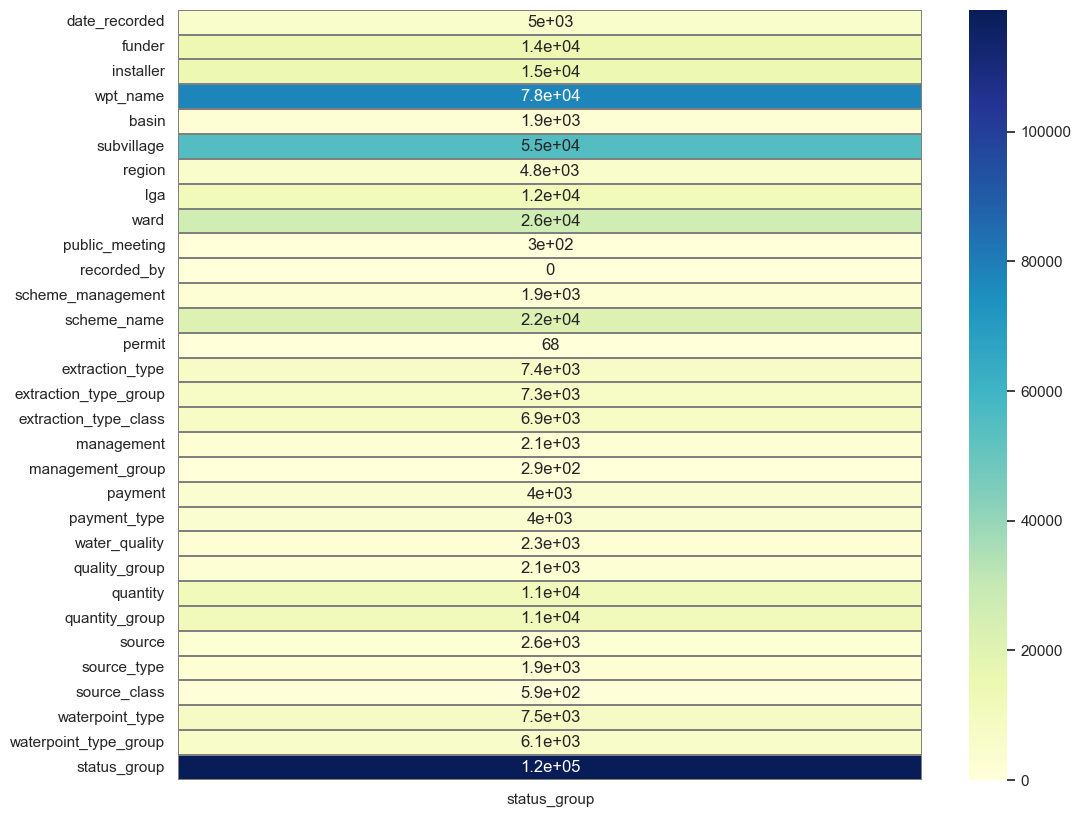

In [ ]:
# plot the test result in heatmap

sns.heatmap(chi2_df, cmap="YlGnBu", annot=True, linewidths=0.3, linecolor='gray', xticklabels=True, yticklabels=True, 
            vmin=pvalues_df.min())
sns.set_theme(rc={'figure.figsize':(12,10)})

# lighter colors are more correlated

In [90]:
pvalues_df


,status_group
date_recorded,0.000000e+00
funder,0.000000e+00
installer,0.000000e+00
wpt_name,3.273699e-15
basin,0.000000e+00
subvillage,0.000000e+00
region,0.000000e+00
lga,0.000000e+00
ward,0.000000e+00
public_meeting,2.409418e-66


<Axes: ylabel='Frequency'>

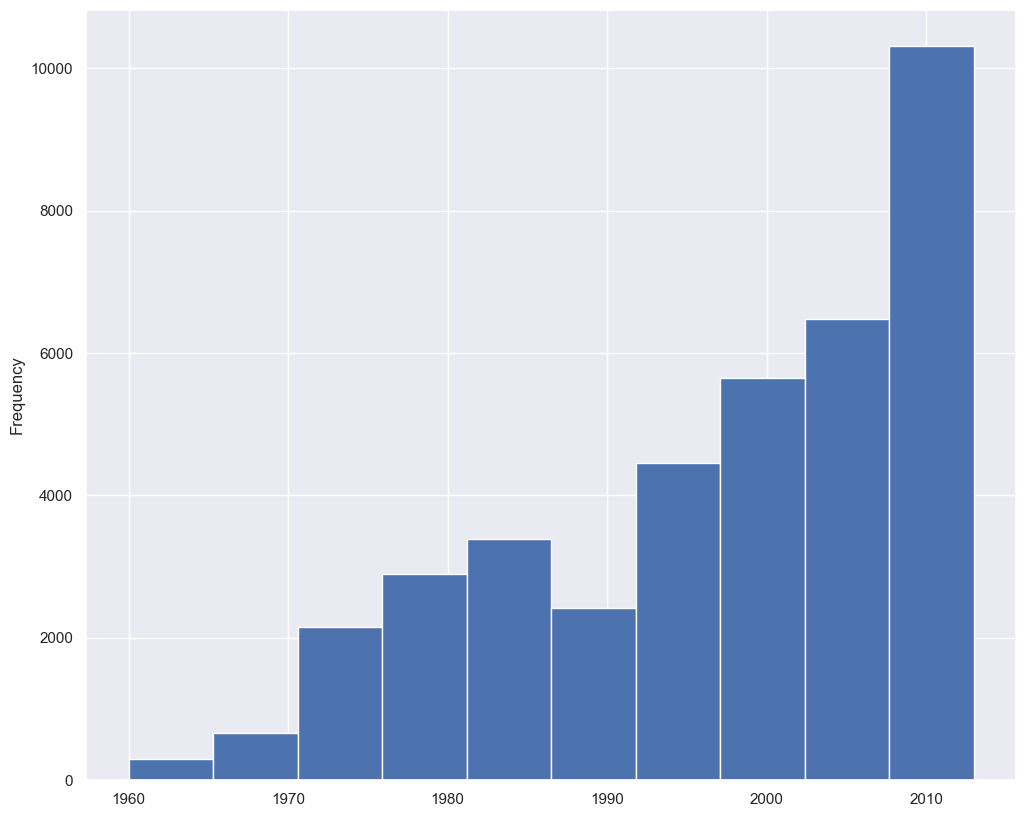

In [92]:
year_df = train_data.loc[train_data["construction_year"]!=0]
year_df["construction_year"].plot(kind="hist")

### Univariant analysis

<Axes: xlabel='status_group'>

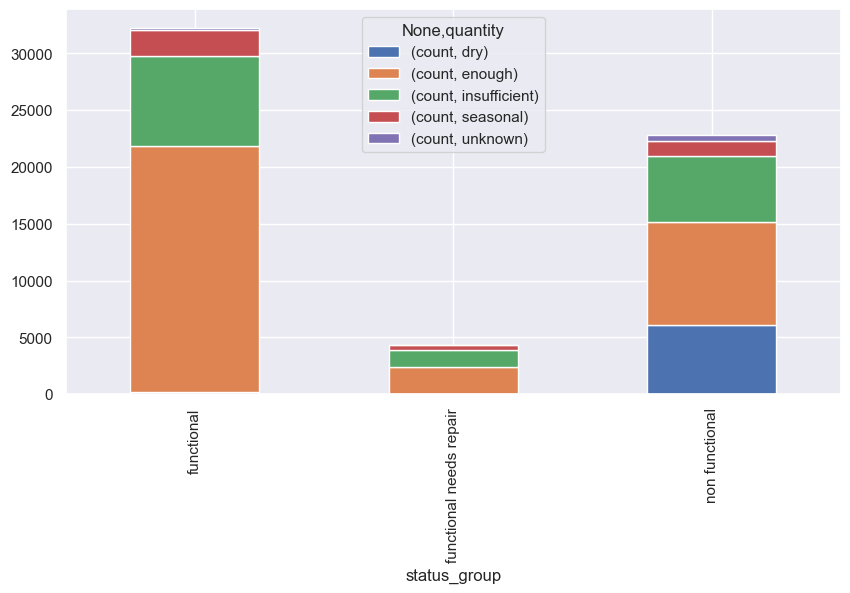

In [14]:
df = pd.DataFrame(train_data.groupby("status_group")["quantity"].value_counts())
df = df.unstack("quantity")
df.plot(kind="bar", stacked=True, figsize=[10, 5])

<Axes: xlabel='status_group'>

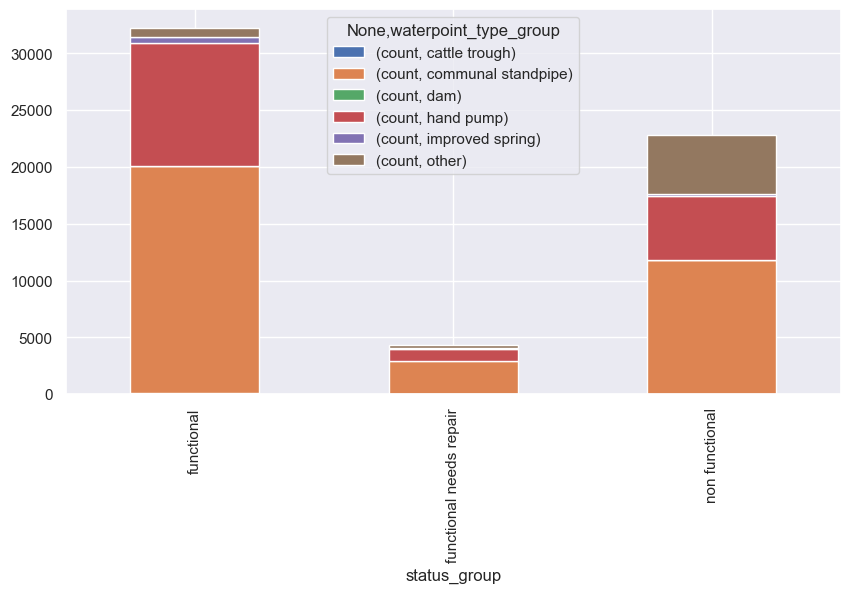

In [15]:
df = pd.DataFrame(train_data.groupby("status_group")["waterpoint_type_group"].value_counts())
df = df.unstack("waterpoint_type_group")
df.plot(kind="bar", stacked=True, figsize=[10, 5])

<Axes: xlabel='region'>

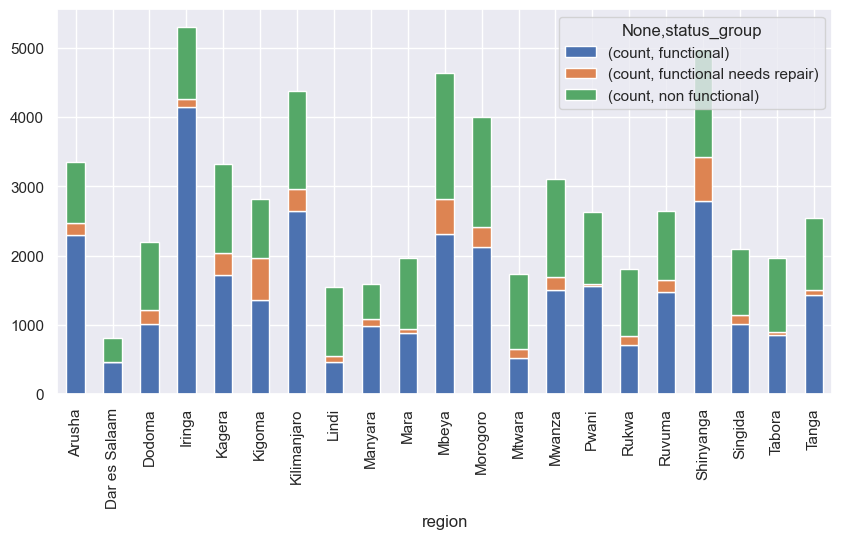

In [16]:
df = pd.DataFrame(train_data.groupby("region")["status_group"].value_counts())
df = df.unstack("status_group")
df.plot(kind="bar", stacked=True, figsize=[10, 5])

<Axes: xlabel='status_group'>

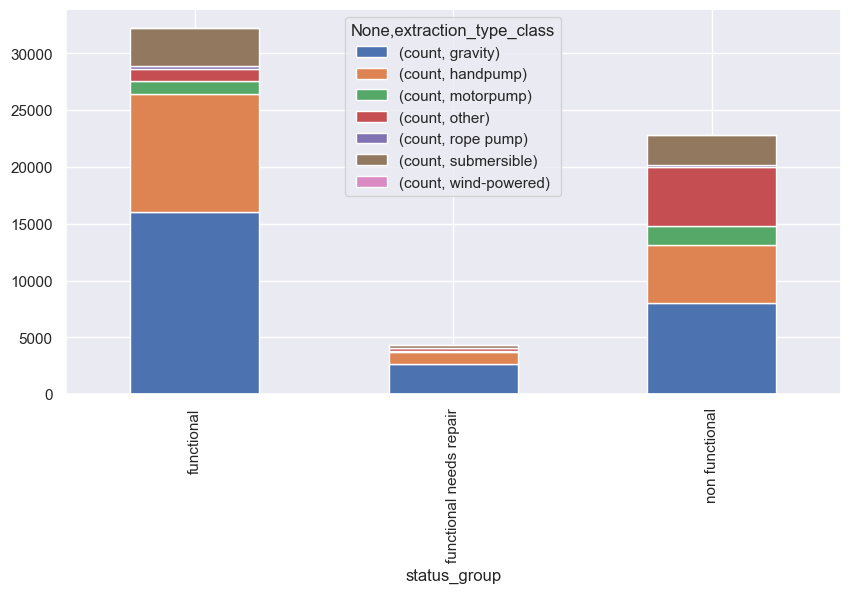

In [17]:
df = pd.DataFrame(train_data.groupby("status_group")["extraction_type_class"].value_counts())
df = df.unstack("extraction_type_class")
df.plot(kind="bar", stacked=True, figsize=[10, 5])

<Axes: xlabel='status_group'>

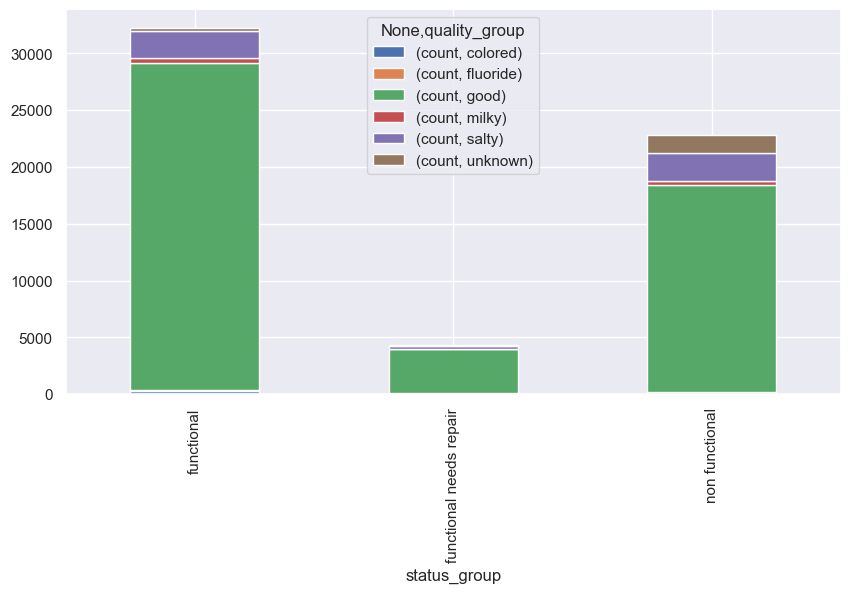

In [18]:
df = pd.DataFrame(train_data.groupby("status_group")["quality_group"].value_counts())
df = df.unstack("quality_group")
df.plot(kind="bar", stacked=True, figsize=[10, 5])

<Axes: xlabel='status_group'>

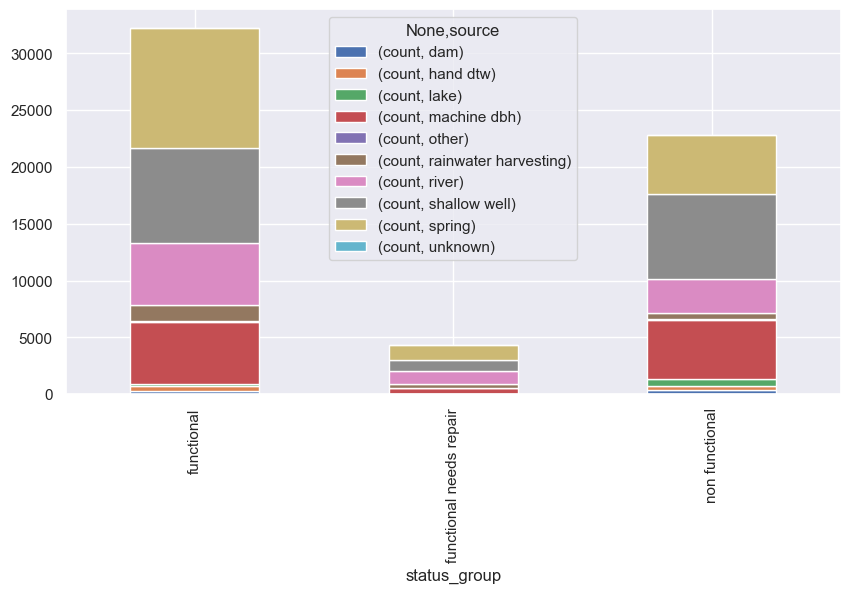

In [19]:
df = pd.DataFrame(train_data.groupby("status_group")["source"].value_counts())
df = df.unstack("source")
df.plot(kind="bar", stacked=True, figsize=[10, 5])

<Axes: xlabel='construction_year'>

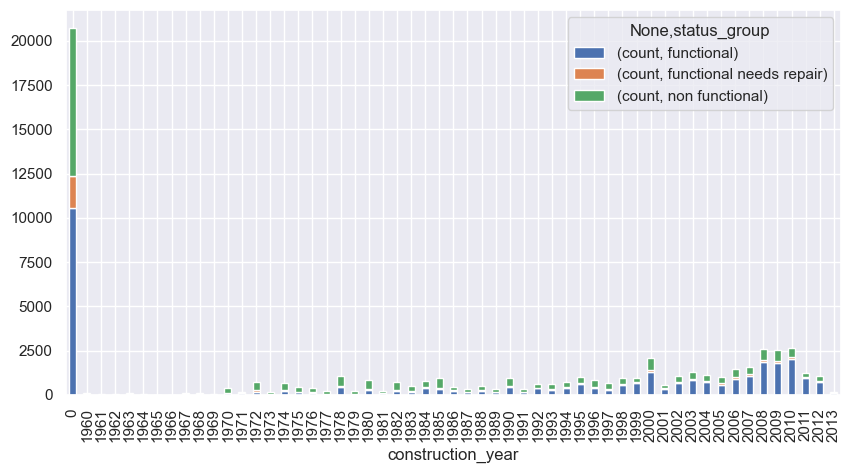

In [20]:
df = pd.DataFrame(train_data.groupby("construction_year")["status_group"].value_counts())
df = df.unstack("status_group")
df.plot(kind="bar", stacked=True, figsize=[10, 5])

<Axes: xlabel='construction_year'>

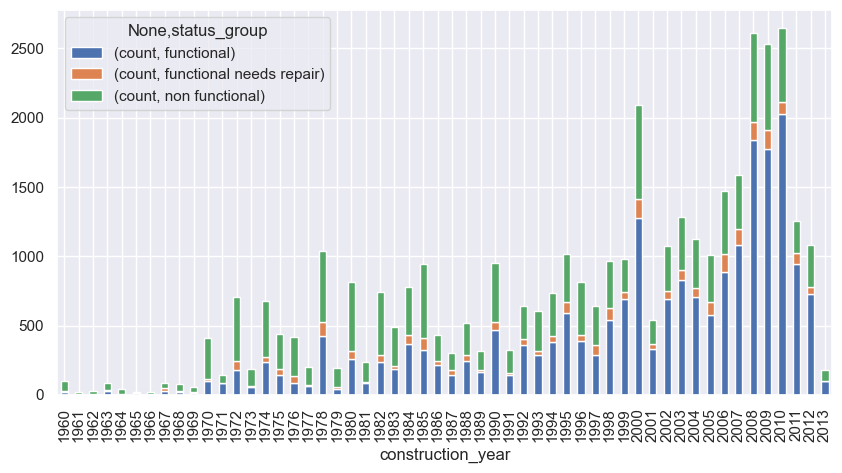

In [21]:
df = train_data.loc[train_data["construction_year"] != 0]
df = pd.DataFrame(df.groupby("construction_year")["status_group"].value_counts())
df = df.unstack("status_group")
df.plot(kind="bar", stacked=True, figsize=[10, 5])